# Imports and Map Upload

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import pandas as pd
from pixell import enmap, utils, enplot
import os
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
from astropy import constants as c
from astropy.cosmology import FlatLambdaCDM
from astropy.units import Quantity
from colossus.halo import mass_adv

In [2]:
#My functions from previous notebooks for Pressure Profiles, Aperture Photometry, Submap plotting, etc
import tSZ_utils as sz

In [19]:
#upload map from drive 
!gdown --id 1-vejMxUopgMcGF5w7YZV_L3WkXEVKh8r -O map.fits

/hpc/home/hkj7/.local/lib/python3.11/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1-vejMxUopgMcGF5w7YZV_L3WkXEVKh8r
From (redirected): https://drive.google.com/uc?id=1-vejMxUopgMcGF5w7YZV_L3WkXEVKh8r&confirm=t&uuid=a279dc8b-42f2-495e-ba42-2743845adcd3
To: /hpc/home/hkj7/map.fits
100%|███████████████████████████████████████| 5.35G/5.35G [00:31<00:00, 171MB/s]


I am using data from ACT DR5 Maps.

* Link to Maps: https://lambda.gsfc.nasa.gov/product/act/actpol_dr5_coadd_maps_get.html
* Map file name is "act_dr5.01_s08s18_AA_f150_night_map.fits"
* (ACT map with observation frequency 150 GHz)
* ACT Cluster Catalog is https://lambda.gsfc.nasa.gov/product/act/actpol_dr5_szcluster_catalog_info.html

I downloaded the file to my google drive and uploaded it into the repository (in ACT_Cluster_Stacking.ipynb) using gdownring

In [3]:
#get ACT Map
file_path = "map.fits"

with fits.open("map.fits") as hdul:
  act_map = hdul[0].data
  header = hdul[0].header

print("Map shape:", act_map.shape)

Map shape: (3, 10320, 43200)


In [4]:
#Get Cluster catalog (as df)
catalog_path = "DR5_cluster-catalog_v1.1.fits"

hdul = fits.open(catalog_path)

data = hdul[1].data      # table is usually in extension 1
df = pd.DataFrame(np.array(data))  # convert to pandas DataFrame

hdul.close()

In [5]:
df

,name,RADeg,decDeg,SNR,y_c,err_y_c,fixed_SNR,fixed_y_c,fixed_err_y_c,template,...,RMDESY3_LAMBDA_CHISQ_E,CAMIRA,CAMIRA_N_mem,opt_RADeg,opt_decDeg,opt_positionSource,notes,knownLens,knownLensRefCode,warnings
0,b'ACT-CL J0000.0-3837',0.020898,-38.626732,4.793987,0.328228,0.068467,4.632617,0.466290,0.100654,b'Arnaud_M4e14_z0p2',...,2.881614,70,-99.000,0.023776,-38.626737,b'RMDESY3',b'',b'',b'',b''
1,b'ACT-CL J0000.2-4357',0.060601,-43.955494,7.678747,0.600471,0.078199,7.576226,0.734902,0.097001,b'Arnaud_M1e14_z0p2',...,4.824760,70,-99.000,0.071517,-43.957593,b'Vis-BCG',b'',b'',b'',b''
2,b'ACT-CL J0000.3-2805',0.089900,-28.091249,5.665297,0.681096,0.120223,4.661066,0.897845,0.192626,b'Arnaud_M8e14_z0p2',...,-99.000000,70,-99.000,0.096956,-28.103488,b'Vis-BCG',b'',b'',b'',b''
3,b'ACT-CL J0000.3-3936',0.083333,-39.604169,4.058639,0.277785,0.068443,3.906909,0.388540,0.099449,b'Arnaud_M4e14_z0p2',...,4.679606,70,-99.000,0.070362,-39.599268,b'RMDESY3',b'',b'',b'',b''
4,b'ACT-CL J0000.4-0102',0.113533,-1.044811,4.997832,0.296879,0.059402,4.450222,0.377924,0.084922,b'Arnaud_M8e14_z0p2',...,3.726360,70,-99.000,0.116001,-1.043040,b'Vis-BCG',b'',b'',b'',b''
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4190,b'ACT-CL J2358.9-4354',359.727531,-43.905169,8.750438,0.552651,0.063157,8.031790,0.777166,0.096761,b'Arnaud_M8e14_z0p2',...,6.078207,70,-99.000,359.721236,-43.908118,b'RMDESY3',b'',b'',b'',b''
4191,b'ACT-CL J2359.5+0208',359.887357,2.138787,9.269819,0.624884,0.067411,8.896495,0.788134,0.088589,b'Arnaud_M2e14_z0p2',...,3.652331,84,64.955,359.889745,2.139955,b'Vis-BCG',b'',"b'235933+020823,D20-2'","b'Jae20,H20a,D20'",b''
4192,b'ACT-CL J2359.5-4608',359.889739,-46.143628,4.623512,1.126720,0.243693,4.236508,0.418773,0.098849,b'Arnaud_M1e14_z1p2',...,-99.000000,70,-99.000,359.907185,-46.135779,b'RMDESY3ACT',b'',b'',b'',b''
4193,b'ACT-CL J2359.7-5010',359.929865,-50.169857,8.924190,1.439237,0.161274,8.831121,0.921787,0.104379,b'Arnaud_M4e14_z1p2',...,4.243377,70,-99.000,359.928406,-50.167165,b'RMDESY3',b'',b'',b'',b''


# Functions

In [6]:
def get_tSZ_real(map, ra, dec):

    """
    get tSZ signal from a cluster with aperture photometry 

    
    ra: float
        RA of cluster
    dec: float
        Declination of cluster
    
    Returns:
    ----------
    disk_mean: float
        mean temperature decrement in inner disk
    ring_mean: float
        mean temperature decrement in outer annulus
    tSZ: float
        tSZ signal calculated as difference between ring_mean and disk_mean
    
    """

    imap_box = sz.galaxy_submap(map, ra, dec, 10)
    
    ap_arcmin=2.1 #arcminutes for radius of inner circle
    pix_scale = 0.5

    disk_mean, ring_mean, tSZ = sz.get_tSZ_signal_aperture_photometry(imap_box[0], ap_arcmin, pix_scale)

    return disk_mean, ring_mean, tSZ

In [17]:
def get_tSZ_in_df(map, bin_df, coords):

    """
    get tSZ values for each cluster in a df and add them to a column in the df. Plot submaps with aperture photometry
    Parameters:
    -----------
    map: 
        file_path to ACT map
    bin_df: pandas.DataFrame
        df containing cluster info for desired clusters
    coords: np array
        contains ra and dec coords for source
        
    Returns:
    ----------
    bin_df: pandas.DataFrame
        copy of original df with added columns for tSZ, disk mean, and ring mean
    """

    # Initialize new columns
    bin_df['disk_mean'] = np.nan
    bin_df['ring_mean'] = np.nan
    bin_df['tSZ'] = np.nan

    N = len(coords)
    per_row = 5
    rows = int(np.ceil(N / per_row))

    fig, axes = plt.subplots(rows, per_row, figsize=(12, 4 * rows))
    axes = axes.flatten()

    # Loop over (df index, coord pair) and subplot axis together
    for ax, (idx, (ra, dec)) in zip(axes, zip(bin_df.index, coords)):

        #Get tsz measurement:
        ap_arcmin=2.1 #arcminutes for radius of inner circle
        pix_scale = 0.5

        imap = sz.galaxy_submap(map, ra, dec, 10)
        disk_mean, ring_mean, tSZ = sz.get_tSZ_signal_aperture_photometry(imap[0], ap_arcmin, pix_scale)

        # Assign back to the DataFrame
        bin_df.loc[idx, 'disk_mean'] = disk_mean
        bin_df.loc[idx, 'ring_mean'] = ring_mean
        bin_df.loc[idx, 'tSZ']       = tSZ

        #Make Subplots:
        plot = enplot.plot(imap[0], upgrade=1, grid=False)
        img = np.array(plot[0].img)
    
        ax.imshow(img)
        ax.set_title(f"({ra:.4f}, {dec:.4f})")
        ax.set_xlabel("Pixels")
        ax.set_ylabel("Pixels")
        ax.set_xticks([])
        ax.set_yticks([])

        # Add circles for aperture and annulus
        # Center in pixel coordinates: (x, y)
        ap_pix = ap_arcmin / pix_scale
        annulus_pix = ap_pix * np.sqrt(2)
        nx, ny = imap[0].shape
        center = (nx / 2, ny / 2)   # (20, 20) for 40×40
        disk_circle = Circle(center, ap_pix, color='red', fill=False, linewidth=1)
        annulus_circle = Circle(center, annulus_pix, color='black', fill=False, linewidth=1)
        ax.add_patch(disk_circle)
        ax.add_patch(annulus_circle)

     # Hide empty subplots if N is not a multiple of per_row
    for j in range(N, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()   

    return bin_df

In [15]:
def simulate_tSZ_for_cluster(M500c_cat, z, N=40, pix_size=0.5,
                             ap_arcmin=2.1, freq=150, Tcmb0=2.7):
    """
    use M500c and redshift to simulate and measure tSZ value (full modeling pipeline)
    
    Parameters:
    -----------
    M500c_cat:
        M500c from Catalog (in 1e^14 Msun)
    z:
        redshift
    pix_size: 
        size of pixels in arcmin
    ap_arcmin:
        radius of aperture
    freq:
        observation frequency in GHz
    Tcmb0:
        reference temperature of map
        
    Returns:
    ----------
    disk_mean: float
        mean temperature decrement in inner disk
    ring_mean: float
        mean temperature decrement in outer annulus
    tSZ: float
        tSZ signal calculated as difference between ring_mean and disk_mean
    """
    # 1. Convert M500c_cat (10^14 Msun) -> M200c (Msun)
    M200c = sz.M500c_to_M200c(M500c_cat, z)  

    # 2. Make y-submap
    y_map = sz.make_y_submap(M200c, z, N, pix_size)

    # 3. Convert y -> deltaT map (µK)
    fSZ  = sz.f_sz(freq, Tcmb0)
    dT_map = (y_map * Tcmb0 * fSZ * u.K).to(u.uK).value

    # 4. Aperture photometry
    disk_mean, ring_mean, tSZ = sz.get_tSZ_signal_aperture_photometry(
        dT_map, ap_arcmin, pix_size
    )

    return dT_map, tSZ, disk_mean, ring_mean

# Strong Signal Clusters:

In [9]:
#Coords centered on sources
Galaxy_coords = np.array([(2.0418, 2.0204), (3.7276, -0.9502), (4.5623, -0.3795), (5.5553, -0.6050), \
                (6.5699, 1.3367), (11.1076, 1.2221), (11.3051, -1.8827), (14.5189, 0.5106), (14.7855, -0.8326), \
                (16.2195, 0.0495), (19.9971, 0.9193), (21.8227, 0.3468), (28.1764, 1.0059), (29.1008, -1.3879), \
                (31.5567, -1.2428), (33.8699, 0.5091), (34.5626, -0.6883), (34.9533, 0.3755), (34.9759, 1.4973), \
                (35.7939, -0.9466), (37.1250, 0.5033), (39.9718, -1.5758), (40.0102, 1.2693), (40.3129, -0.3109)]) # (RA, Decl)

In [10]:
#Find matching rows in catalog df to these coords

mask = np.zeros(len(df), dtype=bool)
# Loop over each coordinate pair and accumulate matches
tol=1e-2
for ra, dec in Galaxy_coords:
    cond = (
        (np.abs(df['RADeg']  - ra)  <= tol) &
        (np.abs(df['decDeg'] - dec) <= tol)
    )
    mask |= cond

group_df = df[mask].copy()

In [11]:
group_df

,name,RADeg,decDeg,SNR,y_c,err_y_c,fixed_SNR,fixed_y_c,fixed_err_y_c,template,...,RMDESY3_LAMBDA_CHISQ_E,CAMIRA,CAMIRA_N_mem,opt_RADeg,opt_decDeg,opt_positionSource,notes,knownLens,knownLensRefCode,warnings
50,b'ACT-CL J0008.1+0201',2.045439,2.019734,15.930553,1.193494,0.074919,15.724351,1.501979,0.095519,b'Arnaud_M8e14_z0p4',...,3.701850,84,70.370,2.043333,2.020083,b'Vis-BCG',b'',b'000814+020120',b'Jae20',b''
93,b'ACT-CL J0014.9-0057',3.726049,-0.950685,17.264223,1.408732,0.081598,16.990648,1.772895,0.104345,b'Arnaud_M8e14_z0p4',...,4.875931,70,-99.000,3.725417,-0.952333,b'Vis-BCG',b'',"b'001454-005708,D20-155'","b'Jae20,D20'",b''
106,b'ACT-CL J0018.2-0022',4.560010,-0.376724,10.120758,0.823742,0.081391,10.008940,1.034943,0.103402,b'Arnaud_M8e14_z0p4',...,6.212466,70,-99.000,4.576667,-0.379389,b'Vis-BCG',b'',b'',b'',b''
128,b'ACT-CL J0022.2-0036',5.551301,-0.604837,18.483118,1.450006,0.078450,17.943530,1.892899,0.105492,b'Arnaud_M2e14_z0p2',...,5.901984,70,-99.000,5.554167,-0.609389,b'Vis-BCG',b'',b'',b'',b''
156,b'ACT-CL J0026.2+0120',6.565584,1.335963,13.270675,0.965262,0.072736,12.972064,1.269218,0.097842,b'Arnaud_M2e14_z0p2',...,4.736817,70,-99.000,6.566250,1.343611,b'Vis-BCG',b'',b'',b'',b''
281,b'ACT-CL J0044.4+0113',11.107179,1.217032,15.068810,1.773518,0.117695,15.012231,1.487369,0.099077,b'Arnaud_M1e14_z0p4',...,4.703502,70,-99.000,11.106667,1.213528,b'Vis-BCG',b'',b'',b'',b'Low delta zCluster redshift'
286,b'ACT-CL J0045.2-0152',11.304304,-1.880051,18.149154,1.391627,0.076677,17.555889,1.810836,0.103147,b'Arnaud_M2e14_z0p2',...,5.298347,70,-99.000,11.302083,-1.875444,b'Vis-BCG',b'',b'',b'',b''
345,b'ACT-CL J0058.0+0031',14.522713,0.518220,15.610886,1.397745,0.089537,15.570563,1.609020,0.103337,b'Arnaud_M4e14_z0p4',...,4.720388,70,-99.000,14.523750,0.516139,b'Vis-BCG',b'',b'',b'',b''
349,b'ACT-CL J0059.1-0049',14.782512,-0.830405,16.745721,1.459845,0.087177,16.637652,1.676210,0.100748,b'Arnaud_M4e14_z0p4',...,5.157645,70,-99.000,14.785417,-0.834917,b'Vis-BCG',b'',b'',b'',b''
395,b'ACT-CL J0104.9+0003',16.229387,0.054831,9.637133,0.659602,0.068444,7.630331,0.763002,0.099996,b'Arnaud_M8e14_z0p2',...,5.229530,70,-99.000,16.230417,0.060056,b'Vis-BCG',b'',"b'010455+000336,DESI-016.2273+00.0668'","b'Jae20,H20a'",b''


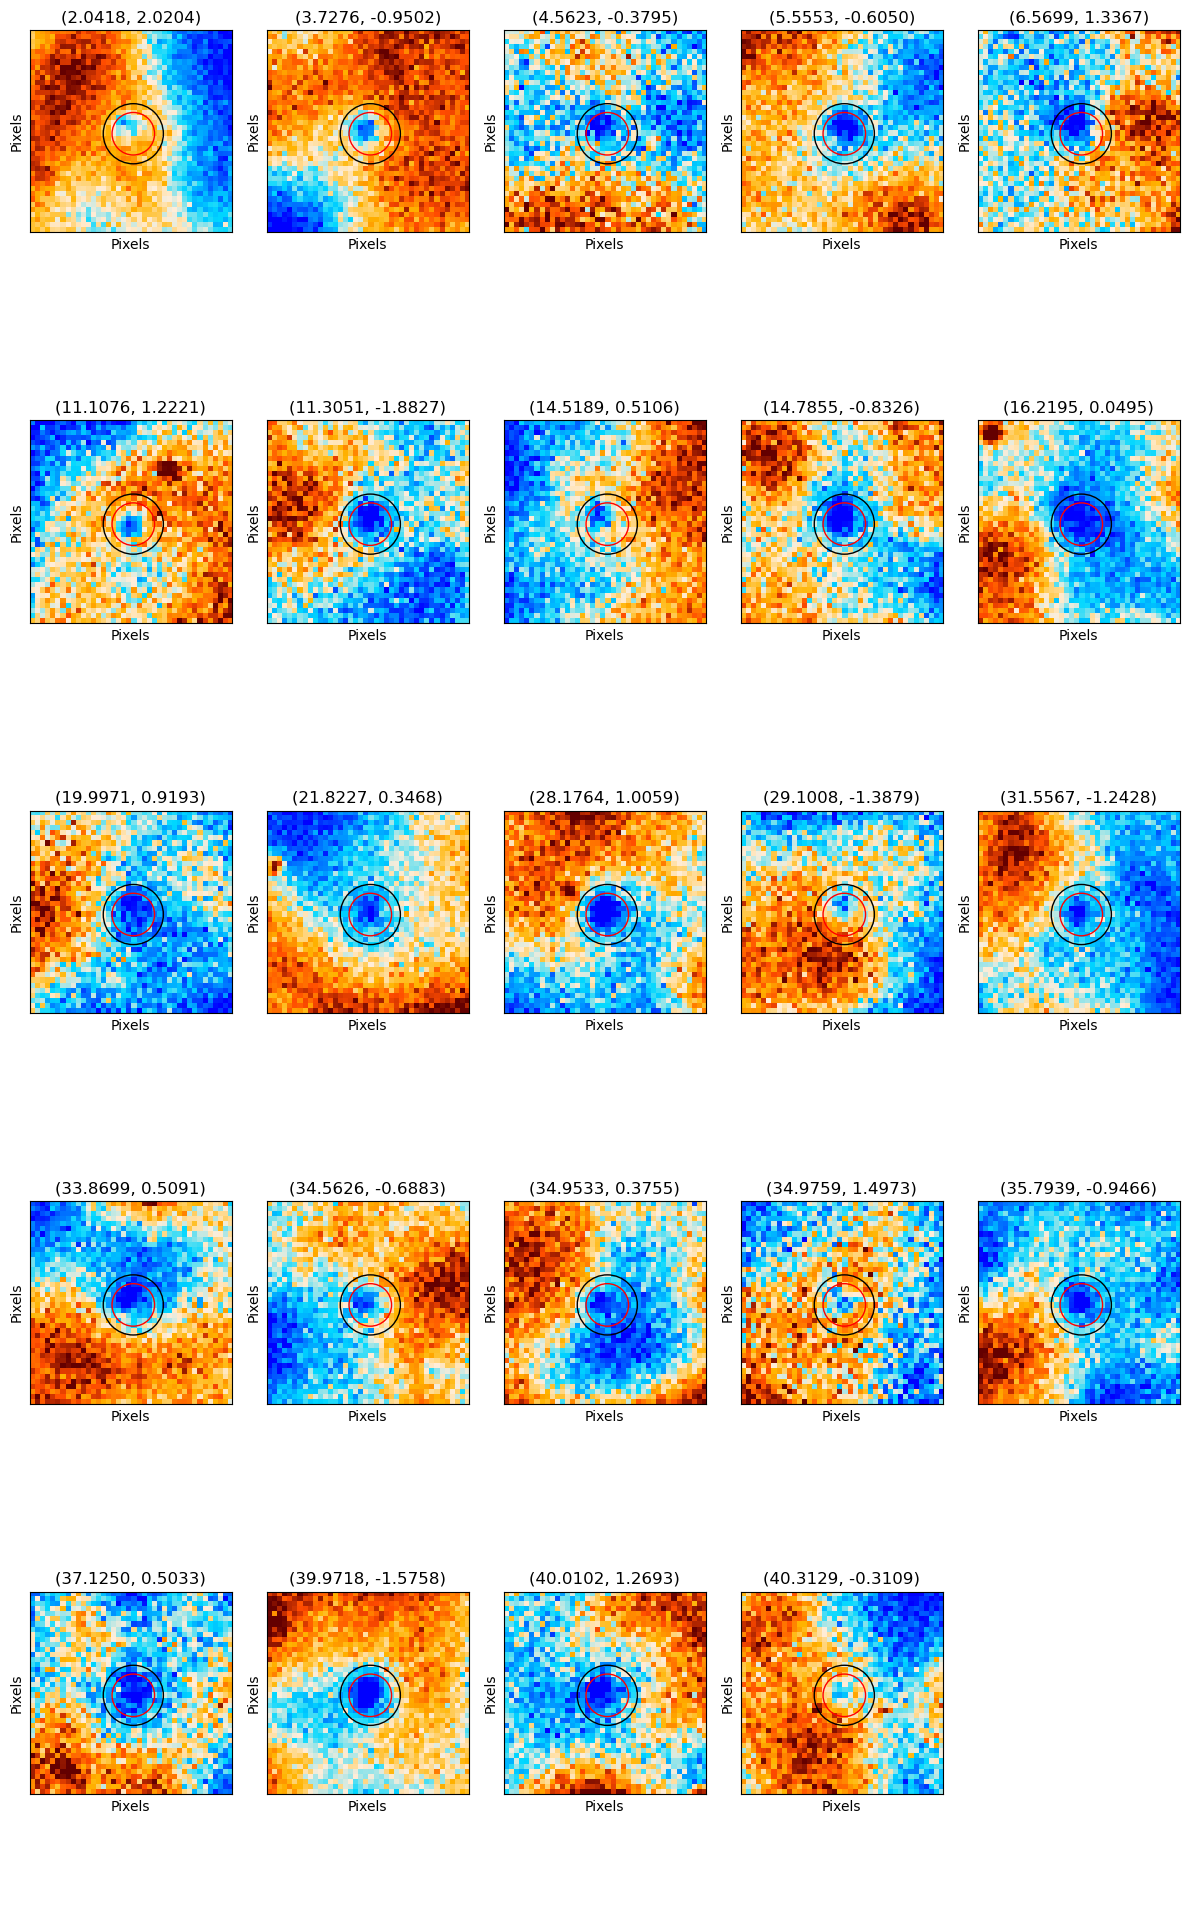

In [12]:
group_df_tSZ = get_tSZ_in_df(file_path, group_df, Galaxy_coords)

# Modeling Cluster Profiles

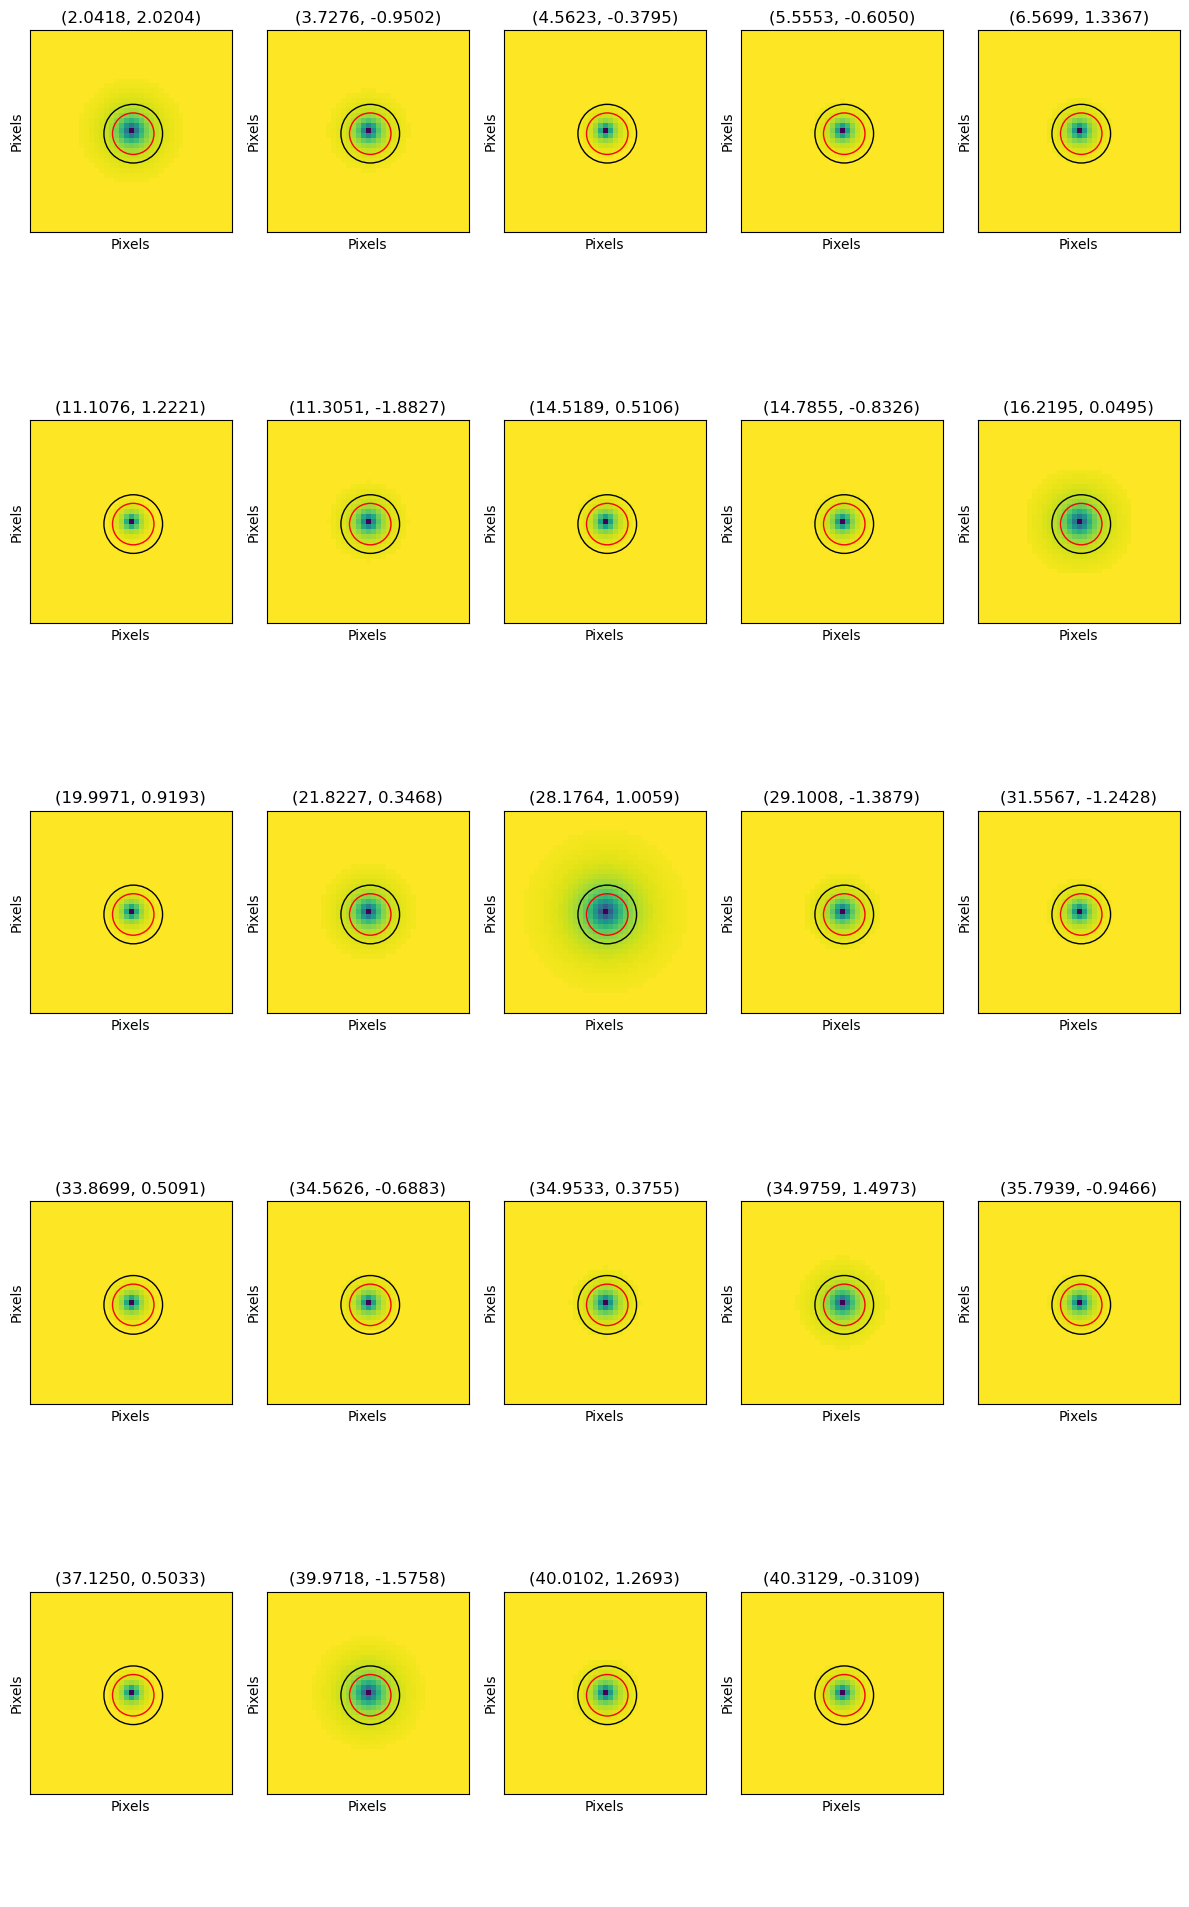

In [18]:
per_row = 5
rows = int(np.ceil(len(Galaxy_coords) / per_row))

# Initialize new columns
group_df_tSZ['sim_disk_mean'] = np.nan
group_df_tSZ['sim_ring_mean'] = np.nan
group_df_tSZ['sim_tSZ'] = np.nan

fig, axes = plt.subplots(rows, per_row, figsize=(12, 4 * rows))
axes = axes.flatten()

for ax, (idx, (ra, dec)) in zip(axes, zip(group_df_tSZ.index, Galaxy_coords)):
    
    M500c = group_df_tSZ.loc[idx, 'M500c']
    z = group_df_tSZ.loc[idx, 'redshift']
    
    dT_map, sim_disk, sim_ring, sim_signal = simulate_tSZ_for_cluster(M500c, z, N=40, pix_size=0.5,
                             ap_arcmin=2.1, freq=150, Tcmb0=2.7)

    # Assign back to the DataFrame
    group_df_tSZ.loc[idx, 'sim_disk_mean'] = sim_disk
    group_df_tSZ.loc[idx, 'sim_ring_mean'] = sim_ring
    group_df_tSZ.loc[idx, 'sim_tSZ'] = sim_signal

    # Plot the maps
    im = ax.imshow(dT_map)
    ax.set_title(f"({ra:.4f}, {dec:.4f})")
    ax.set_xlabel("Pixels")
    ax.set_ylabel("Pixels")
    ax.set_xticks([])
    ax.set_yticks([])

    # Add circles for aperture and annulus
    ny, nx = dT_map.shape
    center = (nx / 2, ny / 2)   # (20, 20) for 40×40

    ap_arcmin=2.1 #arcminutes for radius of inner circle
    pix_scale = 0.5
    ap_pix = ap_arcmin / pix_scale
    annulus_pix = ap_pix * np.sqrt(2)
    
    sim_disk_circle = Circle(center, ap_pix, color='red', fill=False, linewidth=1)
    sim_annulus_circle = Circle(center, annulus_pix, color='black', fill=False, linewidth=1)
    ax.add_patch(sim_disk_circle)
    ax.add_patch(sim_annulus_circle)

# Hide empty subplots if N is not a multiple of per_row
for j in range(len(Galaxy_coords), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show() 

# Compare tSZ Signals

We want to incorporate error in the predicted signals. The values that contribute to this error are:

* uncertainty in z 'redshiftErr'
* uncertainty in M500c 'M500c_errPlus', 'M500c_errMinus'

However, the propogation of these uncertainty values to error is very complicated. Instead of directly computing this based on the actual equations we used to model the cluster, we can use a Monte Carlo method to estimate the uncertainty. The steps are as follows:

* Build a normal distribution of N samples for each cluster's mass and redshift measurement based on the given value and error from the catalog.
* Model the tSZ effect for each mass and redshift sample
* Take the mean and std of each
* The mean becomes our signal and the std $\sigma_{tSZ}$ becomes the error

If we stack clusters into bins, the errors then propagate by:

$$ \sigma_{\text{stack}} = \frac{\sqrt{\sum_i{\sigma^2_{tSZ,i}}}}{N}$$


In [22]:
def tSZ_uncertainty_MC(M500c_cat, sigma_M500c, z_cat, sigma_z,
                       N_samples=200, **sim_kwargs):
    """
    Monte Carlo propagation of M500c,z errors to tSZ prediction.
    Returns mean and std of tSZ across samples.
    """
    # Sample M500c and z from their uncertainties
    # (You can switch to lognormal for mass if desired)
    M_samples = np.random.normal(M500c_cat, sigma_M500c, N_samples)
    z_samples = np.random.normal(z_cat,    sigma_z,     N_samples)

    tSZ_samples = []

    for M500_i, z_i in zip(M_samples, z_samples):
        _, tSZ_i, _, _ = simulate_tSZ_for_cluster(M500_i, z_i, **sim_kwargs)
        tSZ_samples.append(tSZ_i)

    tSZ_samples = np.array(tSZ_samples)
    tSZ_mean = np.mean(tSZ_samples)
    tSZ_std  = np.std(tSZ_samples)

    return tSZ_mean, tSZ_std, tSZ_samples

In [23]:
for idx, row in group_df_tSZ.iterrows():
    M500c_cat   = row['M500c']        # in 10^14 Msun
    sigma_M500c = row['M500cCal_errPlus']  
    z_cat       = row['redshift']
    sigma_z     = row['redshiftErr']

    tSZ_mean, tSZ_std, samples = tSZ_uncertainty_MC(
        M500c_cat, sigma_M500c, z_cat, sigma_z,
        N_samples=200,
        N=40, pix_size=0.5, ap_arcmin=2.1, freq=150, Tcmb0=2.7
    )

    group_df_tSZ.loc[idx, 'sim_tSZ_mean'] = tSZ_mean
    group_df_tSZ.loc[idx, 'sim_tSZ_err']  = tSZ_std

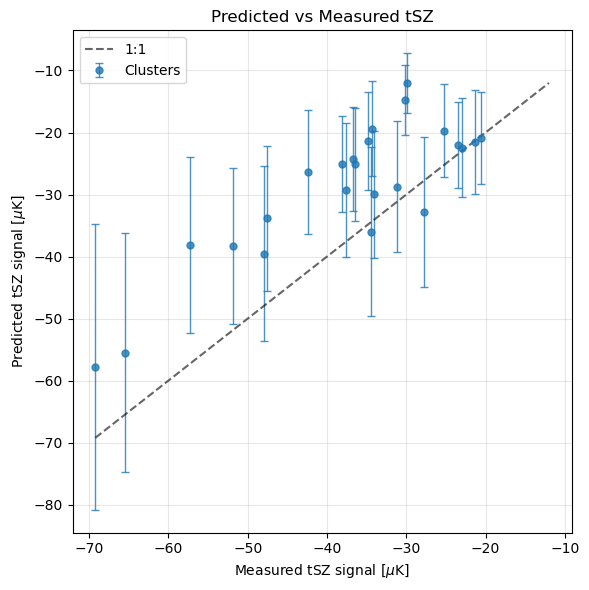

In [24]:
# Extract values
y = group_df_tSZ['sim_tSZ_mean'].values
yerr = group_df_tSZ['sim_tSZ_err'].values

x = group_df_tSZ['tSZ'].values

plt.figure(figsize=(6, 6))

plt.errorbar(
    x, y,
    yerr=yerr,
    fmt='o',
    markersize=5,
    capsize=3,
    elinewidth=1,
    alpha=0.8,
    label='Clusters'
)

# 1:1 reference line
lims = [
    min(x.min(), y.min()),
    max(x.max(), y.max())
]
plt.plot(lims, lims, 'k--', alpha=0.6, label='1:1')

plt.xlabel('Measured tSZ signal [$\mu$K]')
plt.ylabel('Predicted tSZ signal [$\mu$K]')
plt.title('Predicted vs Measured tSZ')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

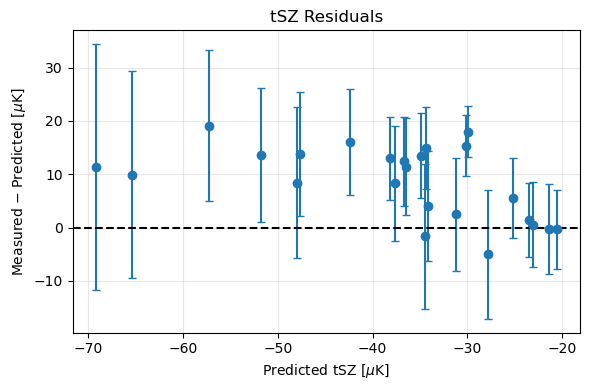

In [26]:
residual = y - x

plt.figure(figsize=(6, 4))

plt.errorbar(
    x, residual,
    yerr,
    fmt='o',
    capsize=3
)

plt.axhline(0, color='k', linestyle='--')
plt.xlabel('Predicted tSZ [$\mu$K]')
plt.ylabel('Measured − Predicted [$\mu$K]')
plt.title('tSZ Residuals')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:
from scipy.stats import chi2

# Extract arrays
tSZ_meas = group_df_tSZ['tSZ'].values
tSZ_pred = group_df_tSZ['sim_tSZ_mean'].values

sigma_pred = group_df_tSZ['sim_tSZ_err'].values

# Chi-square
chi2_val = np.sum((tSZ_meas - tSZ_pred)**2 / sigma_pred**2)

# Degrees of freedom
dof = len(tSZ_meas)  # no fitted parameters yet

# Reduced chi-square
chi2_red = chi2_val / dof

# p-value
p_value = 1 - chi2.cdf(chi2_val, dof)

print(f"χ² = {chi2_val:.2f}")
print(f"χ²_red = {chi2_red:.2f}")
print(f"p-value = {p_value:.3f}")

χ² = 43.90
χ²_red = 1.83
p-value = 0.008


# Stacking Submaps for Mass bins

We will bin galaxies by mass, measure tSZ on real and modeled maps and see how they compare

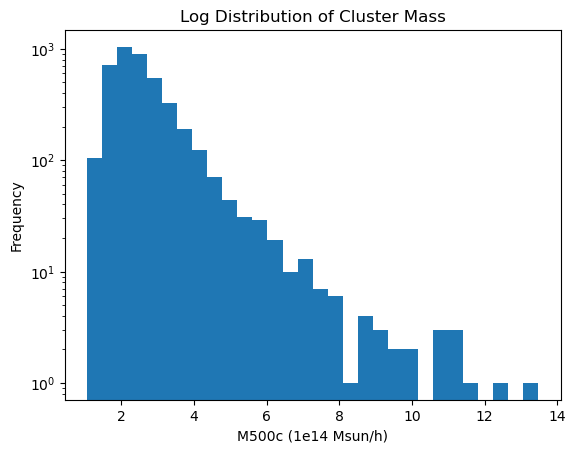

In [43]:
plt.hist(df['M500c'], bins=30)
plt.xlabel("M500c (1e14 Msun/h)")
plt.ylabel("Frequency")
plt.yscale('log')
plt.title("Log Distribution of Cluster Mass")
plt.show()

In [44]:
#Create stacks for these!

def bin_mass(df, mass, N, delta_logM=0.1):
    """
    find a number of clusters from the ACT Catalog that have a desired mass.
    
    Parameters:
    -----------
    df: pandas.DataFrame
        ACT cluster catalog.
    mass: float
        desired mass M500c (in units of Msun/h, like catalog)
    delta_logM : float, optional
        Half-width of the bin in log10(M). Default 0.1
    N: int
        number of clusters to choose

    Returns:
    -----------
    Mass_df: pandas.DataFrame
        df containing the clusters of desired mass, with M500c converted to M200c
    
    """

   # Define the log-mass bin
    logM_target = np.log10(mass)
    logM_min = logM_target - delta_logM
    logM_max = logM_target + delta_logM

    # Compute log10(M500c) for the catalog
    logM_cat = np.log10(df['M500c'].values)

    # Select clusters within the bin
    in_bin_mask = (logM_cat >= logM_min) & (logM_cat <= logM_max)
    in_bin = df[in_bin_mask].copy()

    if in_bin.empty:
        print("No clusters found within the chosen mass bin.")
        return in_bin  # empty df

    # If more than N clusters, choose the N closest in mass
    #    (by absolute difference in logM)
    in_bin['dlogM'] = np.abs(logM_cat[in_bin_mask] - logM_target)
    in_bin = in_bin.sort_values('dlogM').head(N)

    # Convert M500c → M200c for each selected cluster
    M200c_list = []

    for _, row in in_bin.iterrows():
        M500c_i = float(row['M500c'])    # Msun/h
        z_i     = float(row['redshift'])

        M200c_i = sz.M500c_to_M200c(M500c_i, z_i)
        M200c_i_ = M200c_i * sz.cosmo_battaglia.h * 1e14 #units of Solar Mass
        M200c_list.append(M200c_i_)

    in_bin['M200c'] = M200c_list      # Msun/h

    # Drop the helper column
    in_bin = in_bin.drop(columns=['dlogM'])

    return in_bin 

In [45]:
#pull clusters for mass bins around 2e14, 3e14, etc [Msun]
df_mass_2 = bin_mass(df, 2 , 10)
df_mass_3 = bin_mass(df, 2 , 10)
df_mass_4 = bin_mass(df, 2 , 10)
df_mass_5 = bin_mass(df, 2 , 10)
df_mass_6 = bin_mass(df, 2 , 10)
df_mass_7 = bin_mass(df, 2 , 10)

In [ ]:
#stack clusters and measure tSZ

